In [1]:
import pandas as pd
import numpy as np

# Read Data

In [5]:
df = pd.read_excel("D:/New folder/Delhi1.xlsx",index_col=[0], parse_dates=[0],skiprows=2)
## reading a xlsx file using pandas library
df['pm25']=pd.to_numeric(df['pm25'],errors='coerce')
df.sort_values(by=['date'],ascending=True,inplace=True)
rolling_airquality=df['pm25'].fillna(df.pm25.rolling(36,min_periods=1).mean(),inplace=True)

df.head()

,pm25
date,
2018-01-01 00:00:00,423.0
2018-01-01 01:00:00,414.0
2018-01-01 02:00:00,417.0
2018-01-01 03:00:00,466.0
2018-01-01 04:00:00,470.0


# Check For Stationarity

In [6]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [7]:
adf_test(df)

1. ADF :  -3.4809079850259974
2. P-Value :  0.008491170927087628
3. Num Of Lags :  27
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 2346
5. Critical Values :
	 1% :  -3.433140481496303
	 5% :  -2.862772784334684
	 10% :  -2.567426264858143


# Split Data into Training and Testing

In [9]:
print(df.shape)
train=df.iloc[:-300]
test=df.iloc[-300:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(2374, 1)
(2074, 1) (300, 1)
pm25    185.0
Name: 2018-04-04 23:00:00, dtype: float64 pm25    92.0
Name: 2018-04-20 00:00:00, dtype: float64


# Train the Model

In [10]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train,order=(6,1,6))
model=model.fit()
model.summary()

D:\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.pm25   No. Observations:                 2073
Model:                 ARIMA(6, 1, 6)   Log Likelihood              -11048.902
Method:                       css-mle   S.D. of innovations             49.907
Date:                Sat, 01 May 2021   AIC                          22125.805
Time:                        13:58:09   BIC                          22204.720
Sample:                             1   HQIC                         22154.728
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1185      0.136     -0.870      0.384      -0.385       0.148
ar.L1.D.pm25     2.2336      0.162     13.782      0.000       1.916       2.551
ar.L2.D.pm25    -1.4576      0.306     -4.766      0.000      -2.057      -0.858
ar.L3.D.pm25    -0.1478      0.260     -0.569      0.570      -0.657       0.362
ar.L4.D.pm25     0.6549      0.277      2.367      0.018       0.113       1.197
ar.L5.D.pm25    -0.4579      0.222     -2.065      0.039      -0.893      -0.023
ar.L6.D.pm25     0.1317      0.087      1.516      0.129      -0.039       0.302
ma.L1.D.pm25    -2.2765      0.159    -14.276      0.000      -2.589      -1.964
ma.L2.D.pm25     1.3337      0.308      4.324      0.000       0.729       1.938
ma.L3.D.pm25     0.3144      0.268      1.172      0.241      -0.211       0.840
ma.L4.D.pm25    -0.5582      0.283     -1.975      0.048      -1.112      -0.004
ma.L5.D.pm25     0.3644      0.245      1.485      0.138      -0.117       0.845
ma.L6.D.pm25    -0.1724      0.119     -1.446      0.148      -0.406       0.061
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4383           -0.0000j            1.4383           -0.5000
AR.2            0.9693           -0.2608j            1.0038           -0.0418
AR.3            0.9693           +0.2608j            1.0038            0.0418
AR.4            0.6409           -1.6373j            1.7583           -0.1906
AR.5            0.6409           +1.6373j            1.7583            0.1906
AR.6            1.6944           -0.0000j            1.6944           -0.0000
MA.1           -1.4346           -0.0000j            1.4346           -0.5000
MA.2            0.9978           -0.2585j            1.0308           -0.0403
MA.3            0.9978           +0.2585j            1.0308            0.0403
MA.4            1.0458           -0.0000j            1.0458           -0.0000
MA.5            0.2530           -1.8904j            1.9072           -0.2288
MA.6            0.2530           +1.8904j            1.9072            0.2288
-----------------------------------------------------------------------------
"""

In [11]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.index=df.index[start:end+1]
print(pred)

date
2018-04-04 23:00:00    216.830079
2018-04-05 00:00:00    206.127732
2018-04-05 01:00:00    202.199200
2018-04-05 02:00:00    201.231498
2018-04-05 03:00:00    198.934513
                          ...    
2018-04-19 20:00:00    119.615917
2018-04-19 21:00:00    115.576565
2018-04-19 22:00:00    111.485875
2018-04-19 23:00:00    107.616020
2018-04-20 00:00:00    104.222001
Name: ARIMA predictions, Length: 300, dtype: float64


D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='date'>

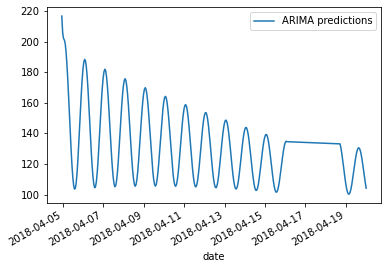

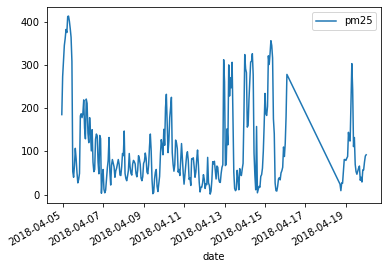

In [12]:
pred.plot(legend=True)
test.plot(legend=True)

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test))
print(rmse)

93.93717567435434


In [14]:
model2=ARIMA(df,order=(6,1,6))
model2=model2.fit()

D:\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will

In [15]:
df.tail()

,pm25
date,
2018-04-19 20:00:00,57.0
2018-04-19 21:00:00,57.0
2018-04-19 22:00:00,75.0
2018-04-19 23:00:00,89.0
2018-04-20 00:00:00,92.0


In [16]:
index_future_dates=pd.date_range(start='2018-04-20 01:00:00',periods=24,freq='H')
pred=model2.predict(start=len(df),end=len(df)+23,typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates
print(pred)

2018-04-20 01:00:00     96.881688
2018-04-20 02:00:00    100.087236
2018-04-20 03:00:00    101.859529
2018-04-20 04:00:00    102.010507
2018-04-20 05:00:00    100.626777
2018-04-20 06:00:00     98.198876
2018-04-20 07:00:00     95.141189
2018-04-20 08:00:00     91.767886
2018-04-20 09:00:00     88.302711
2018-04-20 10:00:00     84.984083
2018-04-20 11:00:00     82.043570
2018-04-20 12:00:00     79.691368
2018-04-20 13:00:00     78.082346
2018-04-20 14:00:00     77.314213
2018-04-20 15:00:00     77.422488
2018-04-20 16:00:00     78.383871
2018-04-20 17:00:00     80.116481
2018-04-20 18:00:00     82.486452
2018-04-20 19:00:00     85.316744
2018-04-20 20:00:00     88.400406
2018-04-20 21:00:00     91.514951
2018-04-20 22:00:00     94.437989
2018-04-20 23:00:00     96.962302
2018-04-21 00:00:00     98.909959
Freq: H, Name: ARIMA Predictions, dtype: float64


D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [17]:
len(pred)

24

# dumping data

In [18]:
import pickle

In [19]:
pickle.dump(model2,open('model.p','wb'))